In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
m_recent = engine.execute ('SELECT MAX(date) FROM Measurement').fetchall()
print(m_recent)

[('2017-08-23',)]


[('2017-08-23',)]


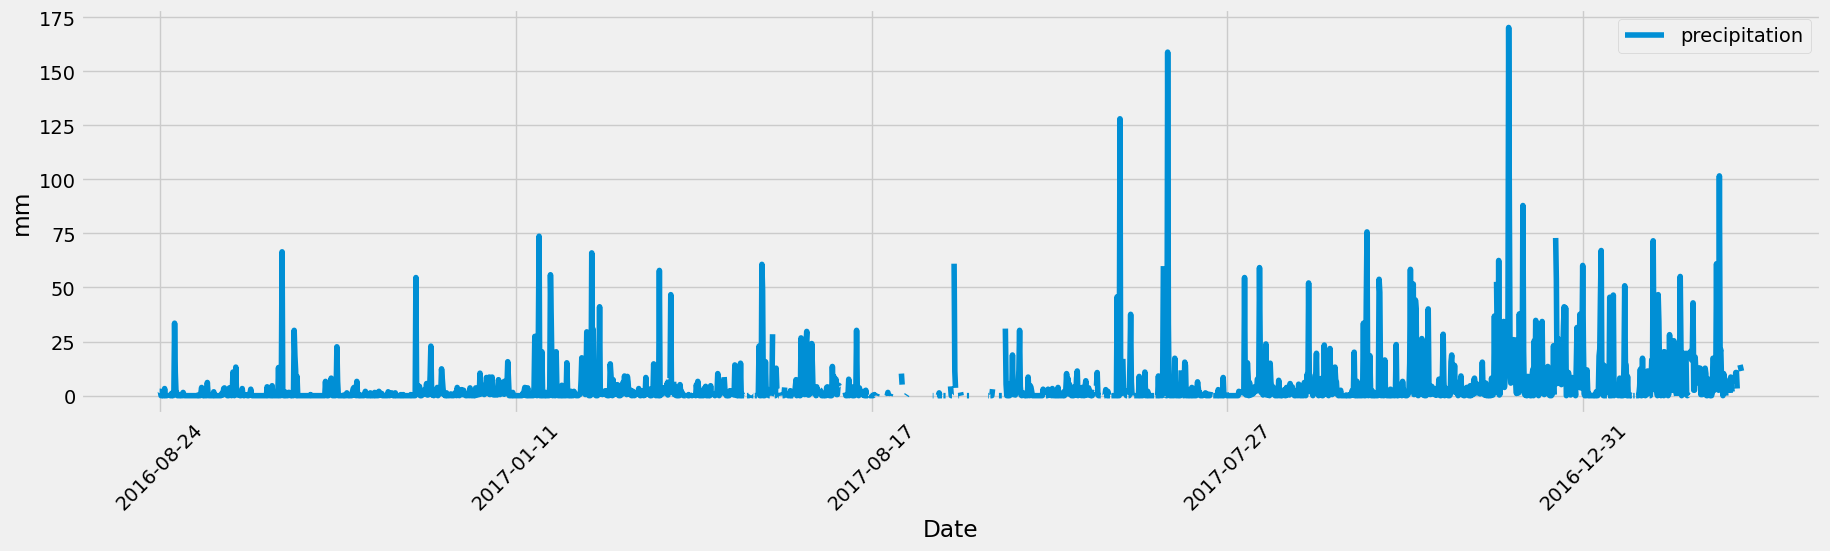

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(m_recent)
# Calculate the date one year from the last date in data set.
query_date = dt.date (2017,8,23) - dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
retrival = dt.date(2017,8,23) - dt.timedelta(days = 365)
precp = session.query(measurement.date, measurement.prcp).filter(measurement.date > retrival).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precp_df = pd.DataFrame(precp, columns=['date', 'precipitation'])
precp_df.set_index('date')
# Sort the dataframe by date
precp_df = precp_df.sort_index(ascending=True)
precp_df
# Use Pandas Plotting with Matplotlib to plot the data

precp_df.plot('date', 'precipitation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.rcParams["figure.figsize"] = (20,5)
plt.xticks(rotation = 45)
plt.show()



In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
precp_df.describe()

,precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_s = session.query(measurement.station, func.count(measurement.station)).\
             group_by(measurement.station).\
             order_by(func.count(measurement.station).desc()).all()
active_s

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
m_active = session.query(measurement.station).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).first()
m_active_s = m_active[0]
m_active_s
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_r = 'USC00519281'
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == station_r).all()

[(12.2, 29.4, 22.03582251082252)]

<AxesSubplot:ylabel='Frequency'>

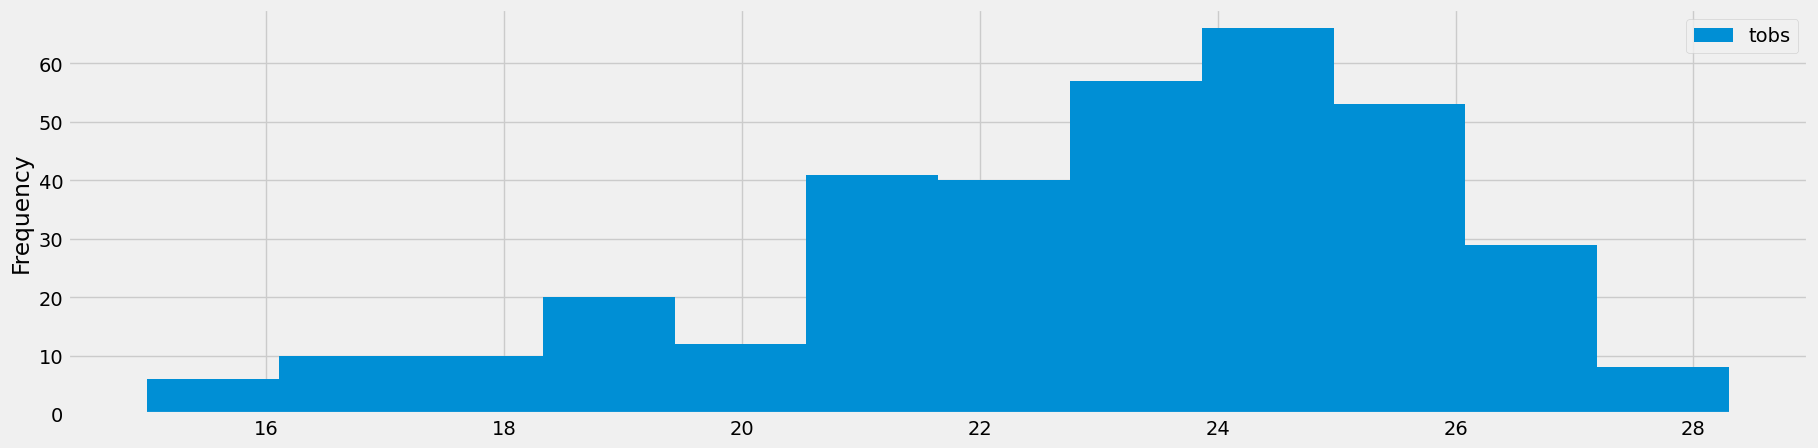

In [57]:
station_winner = active_s[0][0]
results= session.query(measurement.date,measurement.tobs).\
    filter(measurement.date >="2016-08-23").\
    filter(measurement.date <="2017-08-23").\
    filter(measurement.station == station_winner).all()
results_win= pd.DataFrame(results)
results_win.plot.hist(bins=12)

In [47]:
# Close Session
session.close()